In [1]:
import pickle
import glob
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np
import pandas as pd

In [2]:
infos = []
idx_tups = []
for file in glob.glob("../../data/cifar/cifar_m*.p"):
    f = pickle.load(open(file, 'rb'))
    accs = []
    advs = []
    print(len(f), file)
    for fd in f:
        a, y = max([(a, yt - yf) for a, yt, yf in zip(fd['acc'], fd['yeom_tpr'], fd['yeom_fpr'])]) #[-1]
        fd['accs'] = a
        fd['adv'] = y
        accs.append(a)
        advs.append(y)
    
        
    var = file.split("_")[-4:]
    var[-4] = 'is'

    var[-1] = int(var[-1].split(".")[0])
    var[-3] = int(var[-3])
    var[-2] = float(var[-2]) if var[-2] != 'False' else False
    # IDX tups follow the format (epsilon, throw out threshold, batch size)
    var.append(np.mean(accs))
    #var.append(np.max(accs))
    var.append(np.mean(advs))
    #var.append(np.max(advs))
    var.append(np.std(accs))
    var.append(np.std(advs))
    idx_tups.append(var)
    infos.append(fd)

for file in glob.glob("../../data/cifar/cifar_mb_*.p"):
    f = pickle.load(open(file, 'rb'))
    accs = []
    advs = []
    print(len(f), file)
    for fd in f:
        a, y = max([(a, yt - yf) for a, yt, yf in zip(fd['acc'], fd['yeom_tpr'], fd['yeom_fpr'])]) #[-1]
        fd['accs'] = a
        fd['adv'] = y
        accs.append(a)
        advs.append(y)

    
    var = file.split("_")[-4:]
    var[-4] = 'dp'
    var[-1] = int(var[-1].split(".")[0])
    var[-3] = int(var[-3])
    var[-2] = float(var[-2]) if var[-2] != 'False' else False
    
    var.append(np.mean(accs))
    #var.append(np.max(accs))
    var.append(np.mean(advs))
    #var.append(np.max(advs))
    var.append(np.std(accs))
    var.append(np.std(advs))
    idx_tups.append(var)
    infos.append(fd)

5 ../../data/cifar/cifar_m_0_0_64.p
5 ../../data/cifar/cifar_m_10_0_64.p
5 ../../data/cifar/cifar_mb_100_10_128.p
5 ../../data/cifar/cifar_mb_10_10_128.p
5 ../../data/cifar/cifar_m_100_0_64.p
5 ../../data/cifar/cifar_m_50_0_64.p
5 ../../data/cifar/cifar_mb_1000000_5_128.p
5 ../../data/cifar/cifar_m_25_0_64.p
5 ../../data/cifar/cifar_mb_10000_100_128.p
5 ../../data/cifar/cifar_mb_100_1_128.p
5 ../../data/cifar/cifar_m_75_0_64.p
5 ../../data/cifar/cifar_mb_1000_5_128.p
5 ../../data/cifar/cifar_m_5000_0_64.p
5 ../../data/cifar/cifar_mb_1000000_100_128.p
5 ../../data/cifar/cifar_mb_100000_100_128.p
5 ../../data/cifar/cifar_m_1000_0_64.p
5 ../../data/cifar/cifar_mb_10_1_128.p
5 ../../data/cifar/cifar_mb_10_5_128.p
5 ../../data/cifar/cifar_mb_100000_5_128.p
5 ../../data/cifar/cifar_mb_100_5_128.p
5 ../../data/cifar/cifar_mb_100000_1_128.p
5 ../../data/cifar/cifar_m_3000_0_64.p
5 ../../data/cifar/cifar_mb_10000_5_128.p
5 ../../data/cifar/cifar_m_50000_0_64.p
5 ../../data/cifar/cifar_m_1_0_64.

In [3]:
ds = pd.DataFrame(idx_tups)
ds.columns = ['method', 'epsilon', 'throw out', 'batch_size', 'acc', 'yeom', 'acc_std', 'yeom_std']

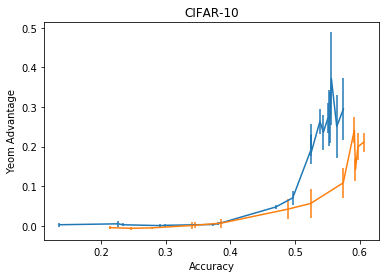

In [4]:
dps = ds[(ds['method'] == 'dp') & (ds['acc'] > 0)].sort_values('acc')
i0 = ds[(ds['method'] == 'is') & (ds['epsilon'] != 0) & (ds['throw out'] == 0) & (ds['acc'] > 0)].sort_values('acc')
base = ds[ds['epsilon'] == 0]

plt.errorbar(dps['acc'], dps['yeom'], yerr=dps['yeom_std'] ) #, xerr=dps['acc_std'])
plt.errorbar(i0['acc'], i0['yeom'], yerr=i0['yeom_std']) #, xerr=i0['acc_std'])

#plt.scatter(base['acc'], base['yeom'], color='g')
plt.xlabel('Accuracy')
plt.title('CIFAR-10')
plt.ylabel('Yeom Advantage')
fig = plt.gcf()
#fig.set_size_inches(4, 4)
plt.savefig('/home/ubuntu/6058f04dd79997b3e3ffcbad/figures/cifar_acc_adv.png', dpi=400)

In [5]:
i0[i0['acc']> .5]

,method,epsilon,throw out,batch_size,acc,yeom,acc_std,yeom_std
15,is,1000,0.0,64,0.523978,0.056113,0.037315,0.036074
21,is,3000,0.0,64,0.574579,0.108329,0.022403,0.037286
23,is,50000,0.0,64,0.591767,0.241580,0.010735,0.033785
12,is,5000,0.0,64,0.593490,0.141318,0.006289,0.028144
35,is,10000,0.0,64,0.597316,0.199322,0.007817,0.034150
25,is,100000,0.0,64,0.606170,0.210894,0.007048,0.024226


In [ ]:
#inf_scalars = [(i[0]['accs'], i[0]['adv'][-1] if type(i[0]['adv']) == list else i[0]['adv'], *i[1]) for i in zip(infos, idx_tups)]
inf_scalars = []
for inf, idx in zip(infos, idx_tups):
    for i , (yt, yf, acc) in enumerate(zip(inf['yeom_tpr'], inf['yeom_fpr'], inf['acc'])):
        inf_scalars.append((i, acc, yt - yf, *idx))
ds = pd.DataFrame(inf_scalars)
print(inf_scalars[-1])
ds.columns = ['epoch', 'acc', 'yeom', 'method', 'epsilon', 'throw out', 'batch_size']

In [ ]:
iss = ds[(ds['epsilon'] != 0) & (ds['method'] == 'is')].sort_values('epsilon')
dps = ds[(ds['epsilon'] != 0) & (ds['method'] == 'dp') & (ds['batch_size'] == 128)].sort_values('epsilon')
base = ds[(ds['epsilon'] == 0) & (ds['throw out'] == 0)]

In [ ]:
plt.scatter(dps['acc'], dps['yeom'], alpha=.7)
plt.scatter(iss['acc'], iss['yeom'], alpha=.7)
plt.scatter(base['acc'], base['yeom'], alpha=.7)
plt.title('CIFAR-10')
plt.xlabel('Accuracy')
plt.ylabel('Advantage')
fig = plt.gcf()
#fig.set_size_inches(4, 4)
plt.savefig('/home/ubuntu/6058f04dd79997b3e3ffcbad/figures/cifar_acc_adv.png', dpi=400)

In [15]:
def plot_noise_results(df, base=None, title=""):
    epsilons = df['epsilon']
    acc = df['acc']
    adv = df['yeom']
    
    if base is not None:
        base_acc = [float(base['acc']) for i in epsilons]    
        base_adv = [float(base['yeom']) for i in epsilons]
    plt.figure()

    ax1 = plt.gca()
    _ = ax1.plot(epsilons, 
                                       acc,  
                                       color='b', 
                                       alpha=.8)
    ax1.set_ylabel('Accuracy', color='b')
    ax1.tick_params('x', colors='b')
    
    if base is not None:
            _ = ax1.plot(epsilons, base_acc,  
                                       '--',
                                       color='b', 
                                       alpha=.8)

    ax2 = ax1.twinx()
    _ = ax2.plot(epsilons, 
                                       adv, 
                                       color='r')

    ax2.set_ylabel('Membership Inference Adv', color='r')
    ax2.tick_params('x', colors='r')
    
    if base is not None:
            _ = ax2.plot(epsilons, base_adv, 
                                       '--',
                                       color='r', 
                                       alpha=.8)


    ax1.set_xlabel('Epsilon (delta = 1e-5)')
    ax1.set_title(title)
    #fig.tight_layout()
    
    plt.xscale('log')
    plt.show() 

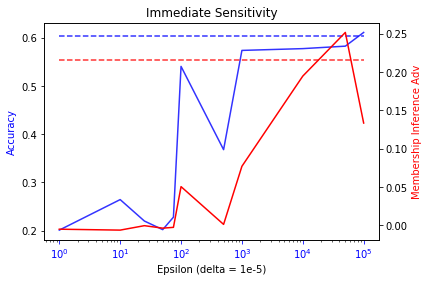

In [20]:
plot_noise_results(iss, base, 'Immediate Sensitivity')

In [22]:
dps.sort_values('yeom')

,acc,yeom,method,epsilon,throw out,batch_size
15,0.273638,0.007329,dp,100,100.0,128
25,0.370693,0.008866,dp,100,10.0,128
17,0.359876,0.009198,dp,100,5.0,128
13,0.414062,0.011121,dp,1000,100.0,128
16,0.468750,0.042405,dp,1000,10.0,128
20,0.467248,0.052172,dp,1000,5.0,128
24,0.469251,0.064675,dp,1000,1.0,128
32,0.495893,0.070453,dp,10000,100.0,128
21,0.532051,0.142356,dp,10000,5.0,128
28,0.519231,0.155163,dp,10000,10.0,128


In [24]:
d

,acc,yeom,method,epsilon,throw out,batch_size
2,0.603065,0.215596,is,0,0.0,64
12,0.554087,0.224319,dp,0,5.0,256
